Faster R-CNN

Import  (tutorial: https://github.com/tensorflow/models/blob/master/object_detection/object_detection_tutorial.ipynb)

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

import densenet


In [2]:
# This is needed to display the images.
%matplotlib inline
sys.path.append(os.path.abspath('./tf_models'))
sys.path.append(os.path.abspath('./tf_models/slim'))

['', '/Users/tuncer/anaconda/envs/tensorflow/lib/python35.zip', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5/plat-darwin', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5/lib-dynload', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5/site-packages', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg', '/Users/tuncer/anaconda/envs/tensorflow/lib/python3.5/site-packages/IPython/extensions', '/Users/tuncer/.ipython', '/Users/tuncer/Documents/Dev/machine-learning/projects/capstone/tf_models']


In [5]:
#READ finetuned FASTER_RCNN model
# Path to frozen detection graph. This is the actual model that is used for the object detection.
detection_model_path = 'models/faster_rcnn/output/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
labels = "data/label_map.pbtxt"
num_classes = 2

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(obj_detection_graph_path, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
    
label_map = label_map_util.load_labelmap(labels)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [6]:
#READ finetuned DENSENET MODEL
img_rows, img_cols = 224, 224  # Resolution of inputs
channel = 3
classification_model_path = 'models/densenet/DenseNet_finetuned_std.h5'
classification_model = densenet161_model(img_rows=img_rows, img_cols=img_cols,
                                        color_type=channel, num_classes=num_classes, weights_path=classification_model_path)


In [9]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def get_obj_img(img,boxes, scores,classes):
    #get the index of the object with highest score
    i = scores.argsort()[1:]
    print('class %d:%s\nboxes %s\n'%(classes[i]), scores[i],boxes[i])
    box = boxes[i] #box [y_min, x_min, y_max, x_max]
    cropped=img[box[0]:box[2],box[1]:box[3]] #img[y: y + h, x: x + w]
    return (box,cropped)

def transform_img_for_densenet(identified_obj, img_rows, img_cols):
    img = cv2.resize(identified_obj, (img_rows, img_cols)).astype(np.float32)
    img[:, :, 0] -= 103.939
    img[:, :, 1] -= 116.779
    img[:, :, 2] -= 123.68
    return img

In [12]:
video_img_paths = ['data/videos/frames/297.png' ]

# Size, in inches, of the output images.
IMAGE_SIZE = (300, 300)

HASANN
 boxes
[[[ 0.34865519  0.31857994  0.50925815  0.39462045]
  [ 0.24961147  0.24611875  0.54292208  0.41034749]
  [ 0.2930885   0.31628275  0.45957983  0.39563566]
  [ 0.34515709  0.29667678  0.50801951  0.36646494]
  [ 0.          0.60574001  0.94770509  0.95205975]
  [ 0.          0.38290977  0.51582956  0.95755625]
  [ 0.22023143  0.01267297  1.          0.33477658]
  [ 0.09660897  0.46115491  0.87764394  0.92580366]
  [ 0.          0.          0.75366539  0.27835292]
  [ 0.25059724  0.26501715  0.54139709  0.42232996]
  [ 0.34868115  0.36041486  0.49828207  0.43935269]
  [ 0.00194949  0.31983808  0.14217754  0.4055883 ]
  [ 0.          0.83428413  0.28860795  0.97024703]
  [ 0.08381744  0.11159515  0.3973226   0.27395087]
  [ 0.          0.          0.67549032  0.48269716]
  [ 0.01929098  0.04591932  0.92799389  0.64080447]
  [ 0.18773793  0.49475038  0.3435412   0.57161754]
  [ 0.21321495  0.          0.90490514  0.28924352]
  [ 0.          0.          0.25013962  0.12166946

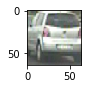

In [13]:

cap = cv2.VideoCapture('data/videos/project_video.mp4')
        
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        while(cap.isOpened()):
            
            cn+=1
            ret, frame = cap.read()
            #image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            #image_np = load_image_into_numpy_array(image)
            
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            print(1)
            image_np_expanded = np.expand_dims(frame, axis=0)
            print(2)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (boxes, scores, classes, num_detections) = sess.run(
              [boxes, scores, classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
            print("boxes\n%s\n\n scores\n%s\n\n classes:%s\n\n\n num_detections:%s\n"%(boxes, scores, classes, num_detections))
            # Visualization of the results of a detection.
            #box [y_min, x_min, y_max, x_max]
            identified_obj = get_obj_img(frame, boxes, scores,classes):
            box, img=transform_img_for_densenet(identified_obj,img_rows, img_cols)
            densenet_input = np.array([img])
            print('\n\n\n\nPredicting')
            predictions = classification_model.predict(densenet_input, batch_size=1, verbose=1)
            #[<confidence on obj is non-vehicle>,<confidence score on object is vehicle>]
            #check if the object is vehicle
            if predictions[1]>predictions[0]:
                #draw the image on the video    
                vs_util.draw_bounding_box_on_image_array(frame,box[0],box[1],box[2],box[3])
                plt.figure(figsize=IMAGE_SIZE)
                plt.imshow(image_np)
            
            break


In [ ]:
file_writer = tf.summary.FileWriter('logs', detection_graph)

In [ ]:
            
            vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              line_thickness=8)
            cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

          plt.figure(figsize=IMAGE_SIZE)
          plt.imshow(image_np)